In [17]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from cvxopt import matrix as cvxopt_matrix
from cvxopt import solvers as cvxopt_solvers

In [63]:
X, y = make_classification(n_classes=2, n_samples=50, n_features = 2
                           ,n_informative=2,n_redundant = 0, 
                           n_clusters_per_class= 1)

y[y==0]=-1

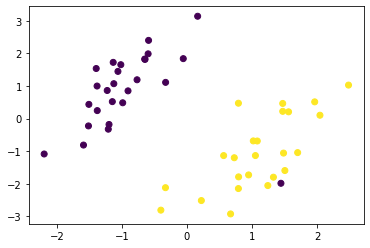

In [65]:
plt.scatter(X[:,0],X[:,1],c=y)


In [66]:
C = 10
m,n = X.shape
y = y.reshape(-1,1) * 1.
X_dash = y * X
H = np.dot(X_dash , X_dash.T) * 1.

#Cvxopt format
P = cvxopt_matrix(H)
q = cvxopt_matrix(-np.ones((m, 1)))
G = cvxopt_matrix(np.vstack((np.eye(m)*-1,np.eye(m))))
h = cvxopt_matrix(np.hstack((np.zeros(m), np.ones(m) * C)))
A = cvxopt_matrix(y.reshape(1, -1))
b = cvxopt_matrix(np.zeros(1))

sol = cvxopt_solvers.qp(P, q, G, h, A, b)
alphas = np.array(sol['x'])
w = ((y * alphas).T @ X).reshape(-1,1)
S = (alphas > 1e-4).flatten()
b = y[S] - np.dot(X[S], w)


     pcost       dcost       gap    pres   dres
 0: -2.8544e+01 -2.2237e+03  5e+03  5e-01  7e-15
 1: -5.5466e+00 -3.3720e+02  3e+02  3e-15  8e-15
 2: -3.1225e+01 -6.5435e+01  3e+01  2e-16  7e-15
 3: -3.6734e+01 -5.0173e+01  1e+01  4e-15  7e-15
 4: -3.7343e+01 -4.8797e+01  1e+01  5e-15  5e-15
 5: -3.9585e+01 -4.4736e+01  5e+00  5e-15  4e-15
 6: -4.0942e+01 -4.4376e+01  3e+00  6e-15  5e-15
 7: -4.0934e+01 -4.3773e+01  3e+00  6e-15  5e-15
 8: -4.1127e+01 -4.3727e+01  3e+00  6e-15  5e-15
 9: -4.2024e+01 -4.2469e+01  4e-01  4e-15  5e-15
10: -4.2214e+01 -4.2220e+01  6e-03  6e-15  6e-15
11: -4.2216e+01 -4.2216e+01  6e-05  3e-15  6e-15
12: -4.2216e+01 -4.2216e+01  6e-07  4e-15  8e-15
Optimal solution found.


In [67]:
print('w = ', w.flatten())
print('b = ', b[0])

Alphas =  [ 1.39382999  5.76653347  5.6272963  10.          9.99999985  9.99999997]
w =  [ 0.91162103 -0.55815324]
b =  [-0.07976547]


[0.91162103]
[-0.55815324]
(10,)
(10,)


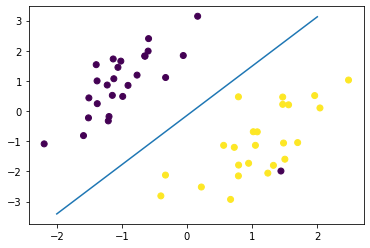

In [68]:
plt.scatter(X[:,0],X[:,1],c = y)
w1 = w[0]
w2 = w[1]
print(w1)
print(w2)
x1 = np.linspace(-2,2,10)
x2= -(w1*x1+b[0])/w2

print(x1.shape)
print(x2.shape)
plt.plot(x1,x2)